<img src="log_reg_thumb.jpg" width=70%>

# Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.arange(0,15)
n_0 = 7
y = np.array(n_0*[0] + (x.shape[0] - n_0)*[1])
print(y.shape[0],x.shape[0])

15 15


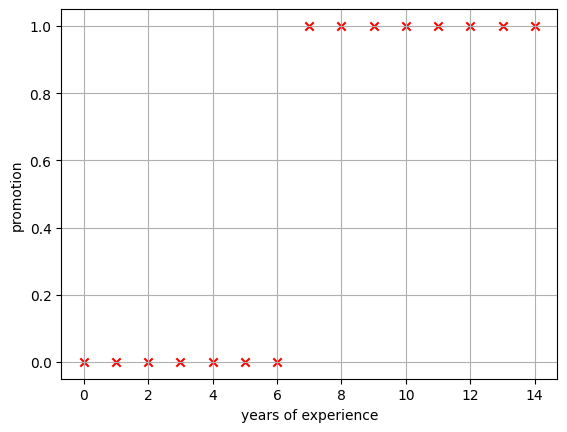

In [3]:
plt.scatter(x,y,color='red',marker='x')
plt.xlabel('years of experience')
plt.ylabel('promotion')
plt.grid('on')

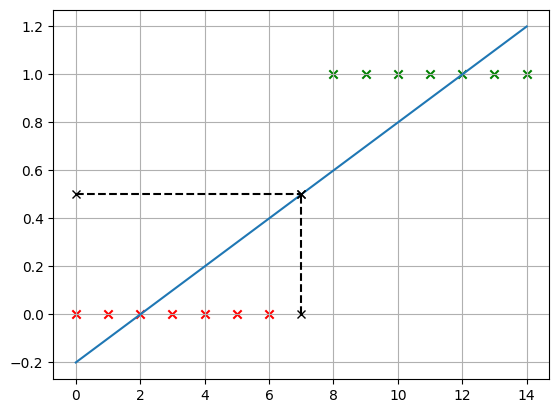

In [5]:
for x_i, y_i in zip(list(x),list(y)):
    if x_i < 7:
        plt.scatter(x_i,y_i,color='red',marker='x')
    if x_i > 7:
        plt.scatter(x_i,y_i,color='green',marker='x')
plt.grid('on')
plt.plot(x,0.1*x-0.2)
plt.plot([7,7],[0,0.5],color='black',linestyle='dashed',marker='x')
plt.plot([0,7],[0.5,0.5],color='black',linestyle='dashed',marker='x')
plt.show()

In [6]:
#sigmoid function

$$
  y(x) = \frac{1}{1+e^{-x}}
$$

$$
  y(x|w,b) = \frac{1}{1+e^{-(wx+b)}}
$$


In [7]:
def sigmoid(x,
            w=1,
            b=0):
    return 1/(1+np.exp(-(w*x+b)))

In [8]:
x_sig = np.arange(-5,5.1,0.1)
sig = sigmoid(x_sig)
sig_3_10 = sigmoid(x_sig,3,10)

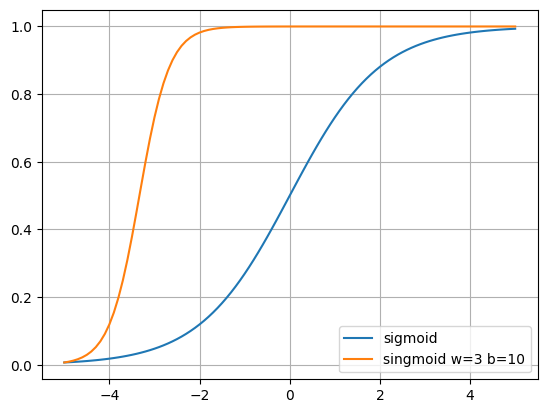

In [9]:
plt.plot(x_sig,sig)
plt.plot(x_sig,sig_3_10)
plt.grid('on')
plt.legend(['sigmoid','singmoid w=3 b=10'])

$$
  y = sigmoid(w*x+b)
$$

$$
  J(w,b) = -\frac{1}{N}[\sum_i^N(y_i*log(sig) + (1-y_i)*log(1-sig))]
$$

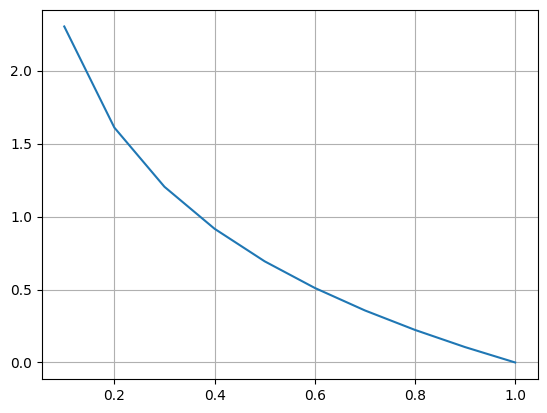

In [10]:
x_cost_1 = np.arange(0.1,1.1,0.1)
log_1 = -np.log(x_cost_1)
plt.plot(x_cost_1,log_1)
plt.grid('on')

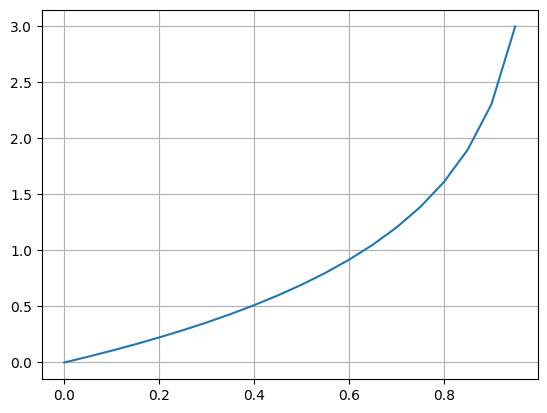

In [11]:
x_cost_0 = np.arange(0.0,1.0,0.05)
log_0 = -np.log(1-x_cost_0)
plt.plot(x_cost_0,log_0)
plt.grid('on')

In [14]:
num_samples = x.shape[0]
W = np.arange(-4,2.45,0.05)
w_list = list(W)
B = np.arange(-5,2.75,0.05)
b_list = list(B)
W_grid, B_grid = np.meshgrid(W, B)

J = np.zeros((W.shape[0],B.shape[0]))
for i,w in enumerate(w_list):
    for j,b in enumerate(b_list):
        sig_param = sigmoid(x,w,b)
        loss = -(np.dot(y,np.log(sig_param)) + np.dot(1-y,np.log(1-sig_param)))/num_samples
        J[i,j] = loss
        #print(i,j,w,b,MSE)

Text(0.5, 0, 'J(w,b)')

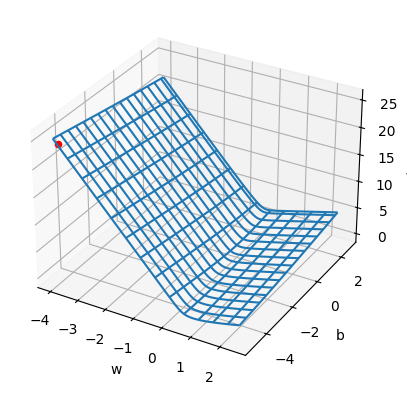

In [15]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_wireframe(W_grid, B_grid, J.T, 
                         rstride=10, 
                         cstride=10)
ax.scatter(w_list[3],b_list[1],J[3,1], marker='o',color="red")
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('J(w,b)')

In [17]:
#cost function
num_samples = x.shape[0]
sig = sigmoid(x)
loss_sig = -(np.dot(y,np.log(sig)) + np.dot(1-y,np.log(1-sig)))/num_samples
loss_sig

1.4807137869176827

In [18]:
dw = np.dot(x, sig-y)/num_samples
dw

1.3479471414016142

In [19]:
db = np.sum(sig-y)/num_samples
db

0.4023891312112651

In [53]:
#initialize weights
# y = sig(w*x+b)
w = np.random.uniform(-0.5,0.5)
b = np.random.uniform(0,1)

loss_in_time = []
w_in_time = [w]
b_in_time = [b]
dw_in_time = []
db_in_time = []

num_samples = x.shape[0]

iter = 5000

for iter_num in range(iter):
    #Step 1: compute gradients

    #compute predictions
    y_pred = sigmoid(x,w,b)

    #compute loss function
    loss_sig = -(np.dot(y,np.log(y_pred)) + np.dot(1-y,np.log(1-y_pred)))/num_samples
    loss_in_time.append(loss_sig)

    #compute gradients
    dw = np.dot(x, y_pred-y)/num_samples
    db = np.sum(y_pred-y)/num_samples
    dw_in_time.append(dw)
    db_in_time.append(db)

    #Step 2: update weights
    lr = 0.1
    w = w - lr*dw
    b = b - lr*db
    w_in_time.append(w)
    b_in_time.append(b)


In [54]:
w,b

(1.552330946060828, -9.919706530413874)

Text(0.5, 0, 'J(w,b)')

<Figure size 500x500 with 0 Axes>

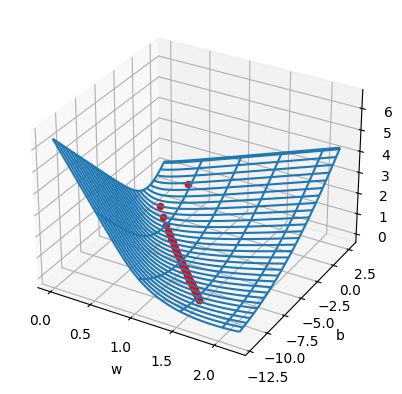

In [60]:
W = np.arange(0,2.25,0.05)
w_list = list(W)
B = np.arange(-12,2.65,0.05)
b_list = list(B)
W_grid, B_grid = np.meshgrid(W, B)

J = np.zeros((W.shape[0],B.shape[0]))
for i,w in enumerate(w_list):
    for j,b in enumerate(b_list):
        sig_param = sigmoid(x,w,b)
        loss = -(np.dot(y,np.log(sig_param)) + np.dot(1-y,np.log(1-sig_param)))/num_samples
        J[i,j] = loss
        #print(i,j,w,b,MSE)

plt.figure(figsize=(5,5))
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_wireframe(W_grid, B_grid, J.T, 
                         rstride=10, 
                         cstride=10)
cut_off = 100
#ax.scatter(5,3,0, marker='X',color="green")

#for w_val, b_val, loss_val in zip(w_in_time[:cut_off],b_in_time[:cut_off],loss_in_time[:cut_off]):
#    ax.scatter(w_val,b_val,loss_val, marker='o',color="red")

#for w_val, b_val, loss_val in zip(w_in_time[:-1],b_in_time[:-1],loss_in_time):
#    ax.scatter(w_val,b_val,loss_val, marker='o',color="red")

for w_val, b_val, loss_val in zip(w_in_time[0:iter:100],b_in_time[0:iter:100],loss_in_time[0:iter:100]):
    ax.scatter(w_val,b_val,loss_val, marker='o',color="red")



ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('J(w,b)')

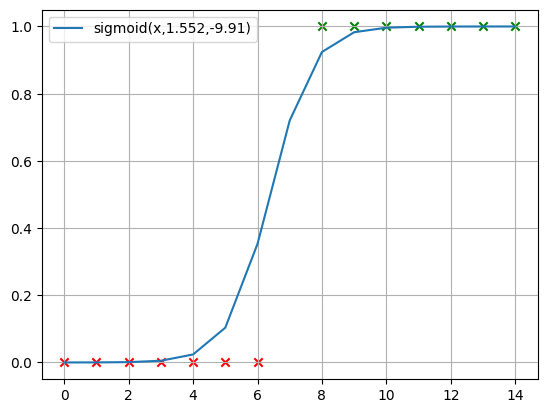

In [68]:
plt.plot(x,sigmoid(x,w_in_time[-1],b_in_time[-1]))
for x_i, y_i in zip(list(x),list(y)):
    if x_i < 7:
        plt.scatter(x_i,y_i,color='red',marker='x')
    if x_i > 7:
        plt.scatter(x_i,y_i,color='green',marker='x')
plt.grid('on')
plt.legend(['sigmoid(x,'+str(w_in_time[-1])[:5]+','+str(b_in_time[-1])[:5]+')'])

Text(0.5, 1.0, 'Loss Function Evolution')

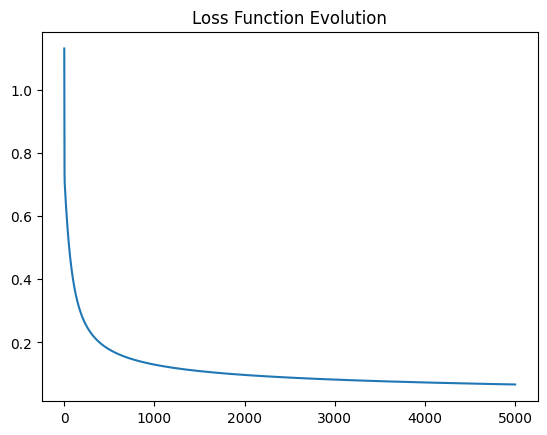

In [71]:
plt.plot(loss_in_time)
plt.title('Loss Function Evolution')
plt.xlabel('Iteration')
plt.ylabel('Loss Function')

Text(0, 0.5, 'dJ(w,b)/dw')

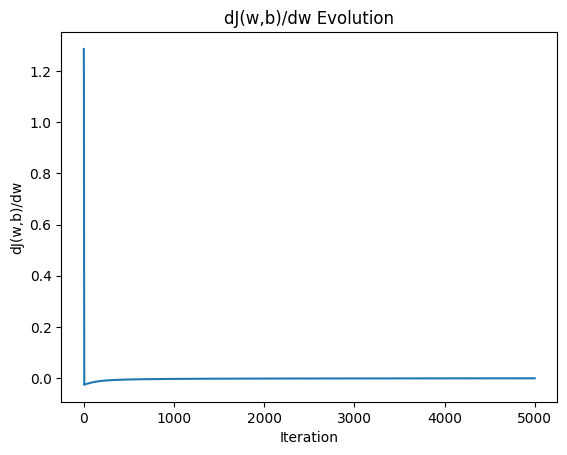

In [72]:
plt.plot(dw_in_time)
plt.title('dJ(w,b)/dw Evolution')
plt.xlabel('Iteration')
plt.ylabel('dJ(w,b)/dw')

Text(0, 0.5, 'dJ(w,b)/db')

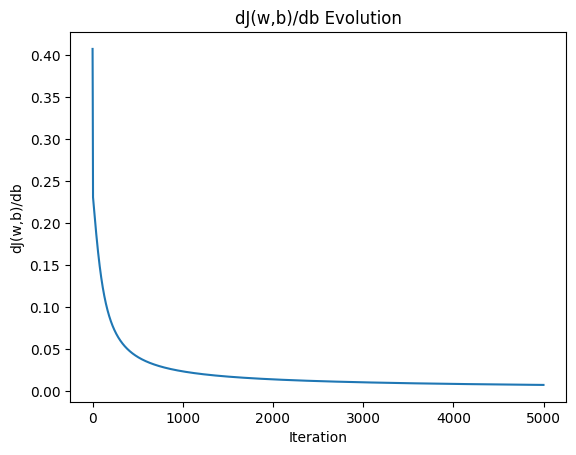

In [73]:
plt.plot(db_in_time)
plt.title('dJ(w,b)/db Evolution')
plt.xlabel('Iteration')
plt.ylabel('dJ(w,b)/db')

In [74]:
import os
os.getcwd()

'C:\\Users\\18623'